In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df=pd.read_csv("C:\\Users\\parth\\OneDrive\\Desktop\\parth\\Machine-learning(Practical & coding)\\DATA\\cancer_tumor_data_features.csv")

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
scaler=StandardScaler()

In [5]:
scaled_X=scaler.fit_transform(df)

In [6]:
scaled_X

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca_model=PCA(n_components=2)

In [12]:
pca_model.fit(scaled_X) # this actual calculating the Eigen values and Eigen vectors

PCA(n_components=2)

In [13]:
pca_model.transform(scaled_X) # This does Projection Step that is Dot Product 

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [14]:
pc_results=pca_model.fit_transform(scaled_X)

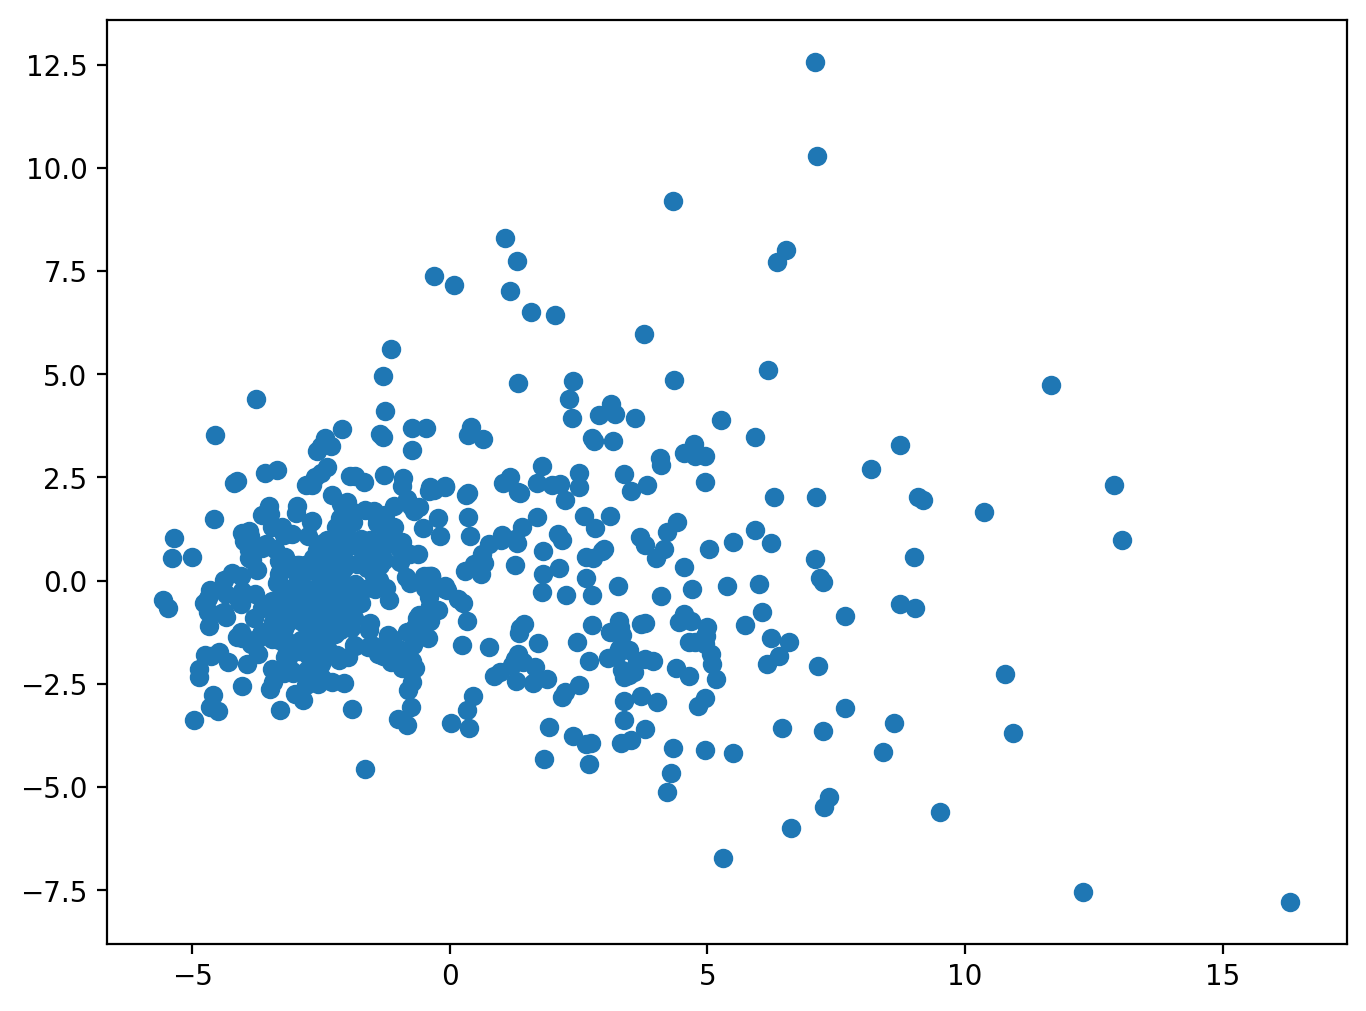

In [16]:
plt.figure(figsize=(8,6),dpi=200)
plt.scatter(pc_results[:,0],pc_results[:,1])

In [17]:
pca_model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [20]:
df_compo=pd.DataFrame(pca_model.components_,index=['PC1','PC2'],columns=df.columns)

In [21]:
df_compo

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<Axes: >

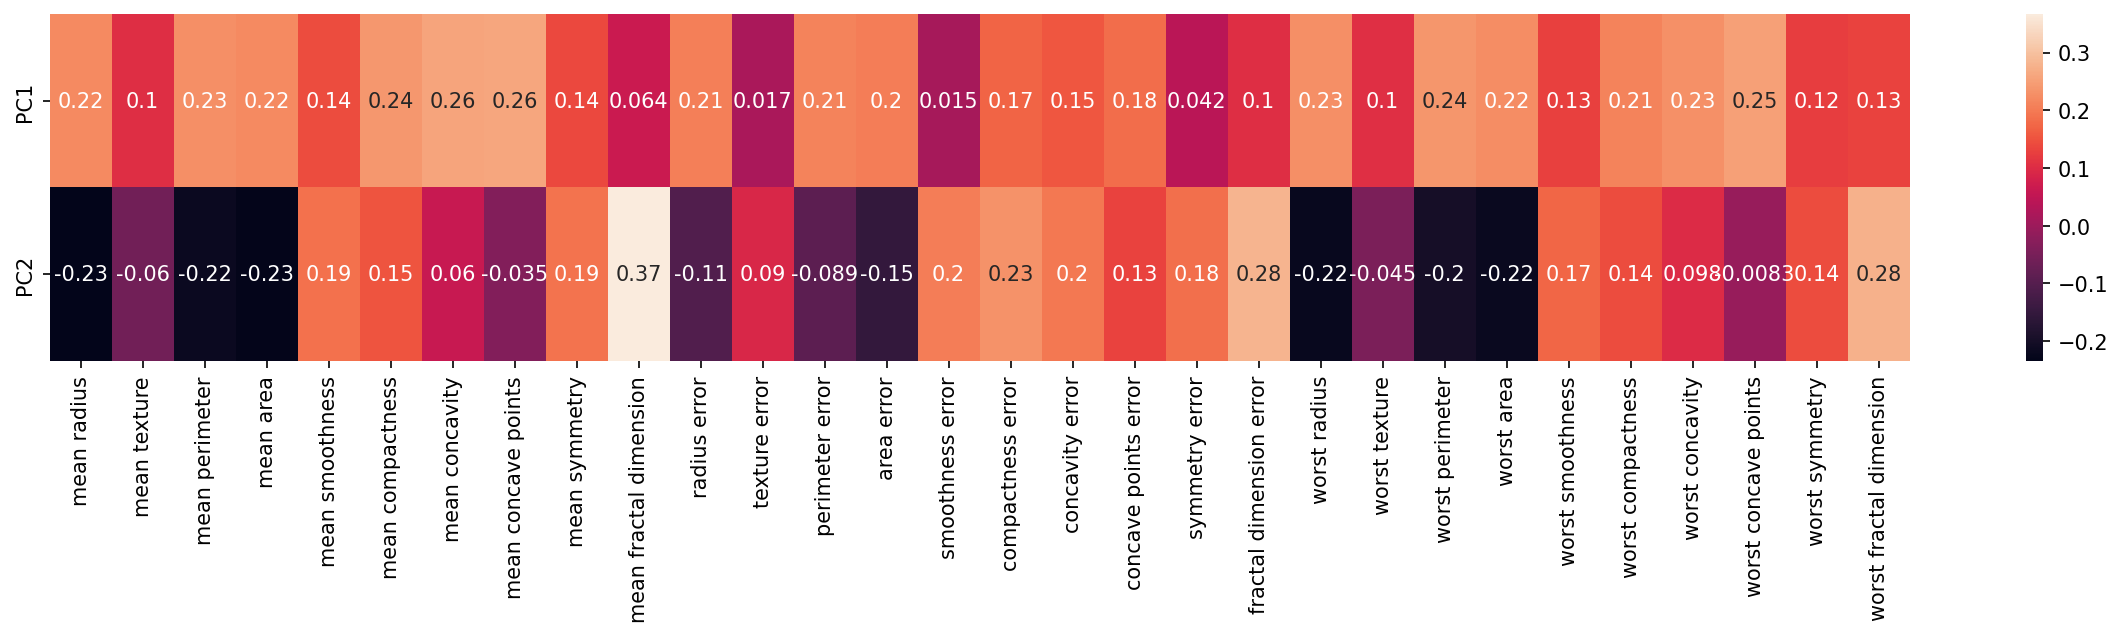

In [23]:
plt.figure(figsize=(20,3),dpi=150)
sns.heatmap(df_compo,annot=True)

In [24]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155945

In [25]:
pca_30=PCA(n_components=30)

In [26]:
pca_30.fit(scaled_X)

PCA(n_components=30)

In [28]:
np.sum(pca_30.explained_variance_ratio_) #this is because there is nothing change here 

1.0

In [29]:
explained_variance=[]
for n in range(1,30):
    pca=PCA(n_components=n)
    pca.fit(scaled_X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Variance Explained')

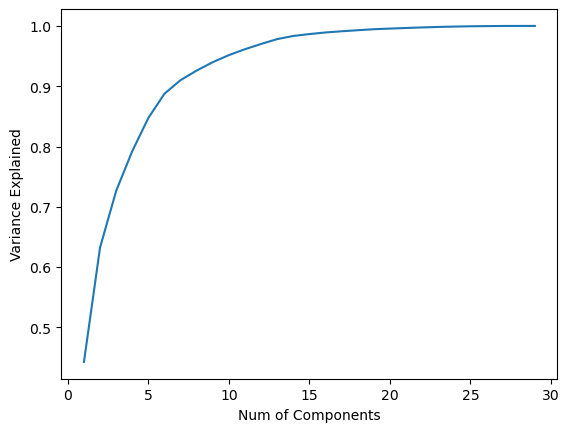

In [30]:
plt.plot(range(1,30),explained_variance)
plt.xlabel("Num of Components")
plt.ylabel("Variance Explained")